In [3]:
import time
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
cores = [i+1 for i in range(8)]
times = []

In [3]:
dataset = pd.read_csv('6_lakh(head).csv')
X= dataset.iloc[:,0:6]
y= dataset.iloc[:,6]

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=np.array(X.head(5000))
y=np.array(y.head(5000))
X = sc.fit_transform(X)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,stratify=y)

In [6]:
class KNN():
    def __init__(self):

        self.X_train = []
        self.y_train = []

    def euclidian(self,x1,x2):

        difference =  np.subtract(x1,x2)
        square_difference = np.power(difference,2)
        sum_square_difference = np.sum(square_difference)

        return sum_square_difference**(0.5)

    def fit(self,X,y):

        self.X_train = X
        self.y_train = y

    def predict(self,X_test,k=9):

        y_pred = []

        for i in range(X_test.shape[0]):
            distances = []
            for j in range(self.X_train.shape[0]):
                distances.append(self.euclidian(X_train[j],X_test[i]))

            indeces = np.argsort(np.array(distances))
            sol = 0
            threshold=0.5
            for K in range(k):

                sol += self.y_train[indeces[K]]
            if((sol/k)>=0.5):
                y_pred.append(1)
            else:
                y_pred.append(0)
        return y_pred

In [7]:
X_test.shape

(4000, 6)

In [11]:
model = KNN()
model.fit(X_train,y_train.reshape(y_train.shape[0],))
def main(threads):
    start = time.time()
    y_pred = Parallel(n_jobs=threads)(delayed(model.predict)(X_test[i]) for i in range(X_test.shape[0]))
    end = time.time()
    return end - start

In [12]:
if __name__=="__main__":
    time_taken = main(1)
    times.append(time_taken)
    print(time_taken)

166.64732909202576


In [13]:
if __name__=="__main__":
    time_taken = main(2)
    times.append(time_taken)
    print(time_taken)

100.06449222564697


In [14]:
if __name__=="__main__":
    time_taken = main(3)
    times.append(time_taken)
    print(time_taken)

81.22617840766907


In [15]:
if __name__=="__main__":
    time_taken = main(4)
    times.append(time_taken)
    print(time_taken)

89.8452537059784


In [16]:
if __name__=="__main__":
    time_taken = main(5)
    times.append(time_taken)
    print(time_taken)

89.70141410827637


In [17]:
if __name__=="__main__":
    time_taken = main(6)
    times.append(time_taken)
    print(time_taken)

89.45765018463135


In [18]:
if __name__=="__main__":
    time_taken = main(7)
    times.append(time_taken)
    print(time_taken)

95.22697687149048


In [19]:
if __name__=="__main__":
    time_taken = main(8)
    times.append(time_taken)
    print(time_taken)

90.57944536209106


In [6]:
times

[166.64732909202576,
 100.06449222564697,
 81.22617840766907,
 89.8452537059784,
 89.70141410827637,
 89.45765018463135,
 95.22697687149048,
 90.57944536209106]

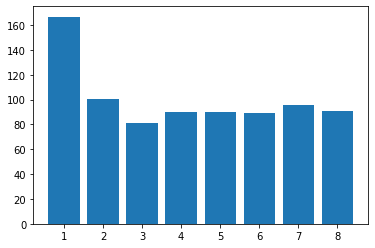

In [7]:
plt.bar(cores, times)
plt.show()